<a href="https://colab.research.google.com/github/ValGrace/position-salaries-ml/blob/main/PositionSalaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/ValGrace/position-salaries-ml/main/position_salaries.csv'
dataset = pd.read_csv(url)

#storing data in a dataframe

In [ ]:
#.iloc function slices the dataframe to assign corresponding indexes to x and y
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=0) 

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train) 
y_prediction = linear.predict(X_test)

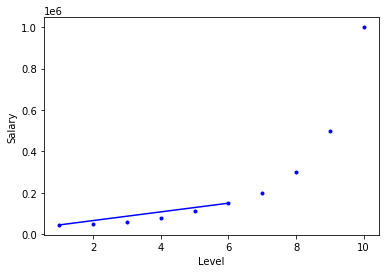

In [ ]:
# plt.scatter(X_train, y_train, color='red') 
plt.plot(X_train, linear.predict(X_train), color='blue')
plt.plot(X, y, 'b.')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Applying polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score 

polyn = PolynomialFeatures(degree=4, include_bias=True)
x_train_transform = polyn.fit_transform(X_train)
x_test_transform = polyn.transform(X_test)

#including the bias parameter
linear = LinearRegression()
linear.fit(x_train_transform, y_train)
y_predict = linear.predict(x_test_transform)
values = ({'Real Values': y_test, 'Predicted Values': y_predict})
df = pd.DataFrame(values)
print(r2_score(y_test, y_predict))

0.9512397542387644


In [ ]:
df

,Real Values,Predicted Values
0,60000,51665.932154
1,500000,571952.044071
2,110000,95877.355755
3,1000000,846701.942592
4,50000,46281.066976
5,200000,238818.614091
6,300000,374712.177443
7,80000,65964.076544


In [ ]:
print(linear.intercept_)
print(linear.coef_)

44905.62481878805
[ 0.          0.30443607  2.13105248 13.09075094 78.84894172]


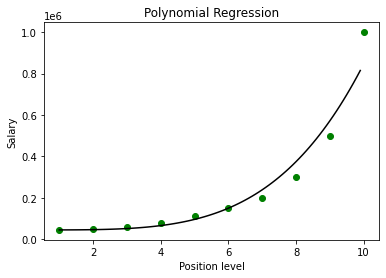

In [ ]:
#visualizing the polynomial Regression results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
y_grid = linear.predict(polyn.fit_transform(X_grid))
plt.scatter(X, y, color = 'green')
plt.plot(X_grid, y_grid, color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

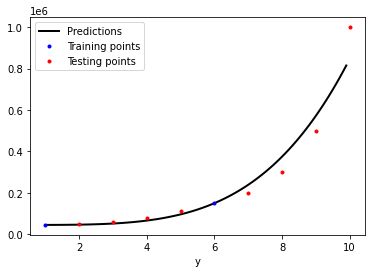

In [113]:
plt.plot(X_grid, y_grid, color='black', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training points')
plt.plot(X_test, y_test, 'r.', label='Testing points')
plt.xlabel('X')
plt.xlabel('y')
plt.legend()
plt.show()